In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])

In [3]:
df.shape

(173887, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 16.6+ MB


In [9]:
# ========================================
# EXPLORATORY DATA ANALYSIS
# ========================================

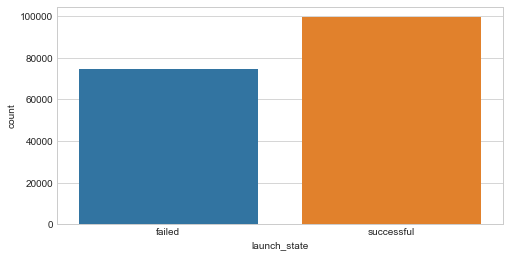

In [6]:
fig=plt.figure(figsize=(8, 4))
sns.set_style('whitegrid')
sns.countplot(x='launch_state',data=df)

In [8]:
df.columns

Index(['id', 'name', 'category', 'goal', 'backers_count', 'pledged',
       'disable_communication', 'country', 'deadline', 'created_at',
       'launched_at', 'staff_pick', 'spotlight', 'creator_registered',
       'launch_state'],
      dtype='object')

In [10]:
df.drop(columns=['id','name']).head(2)

,category,goal,backers_count,pledged,disable_communication,country,deadline,created_at,launched_at,staff_pick,spotlight,creator_registered,launch_state
0,technology,3500.0,1,50.00,False,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,True,failed
1,games,225.0,63,1613.47,False,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,True,successful


C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


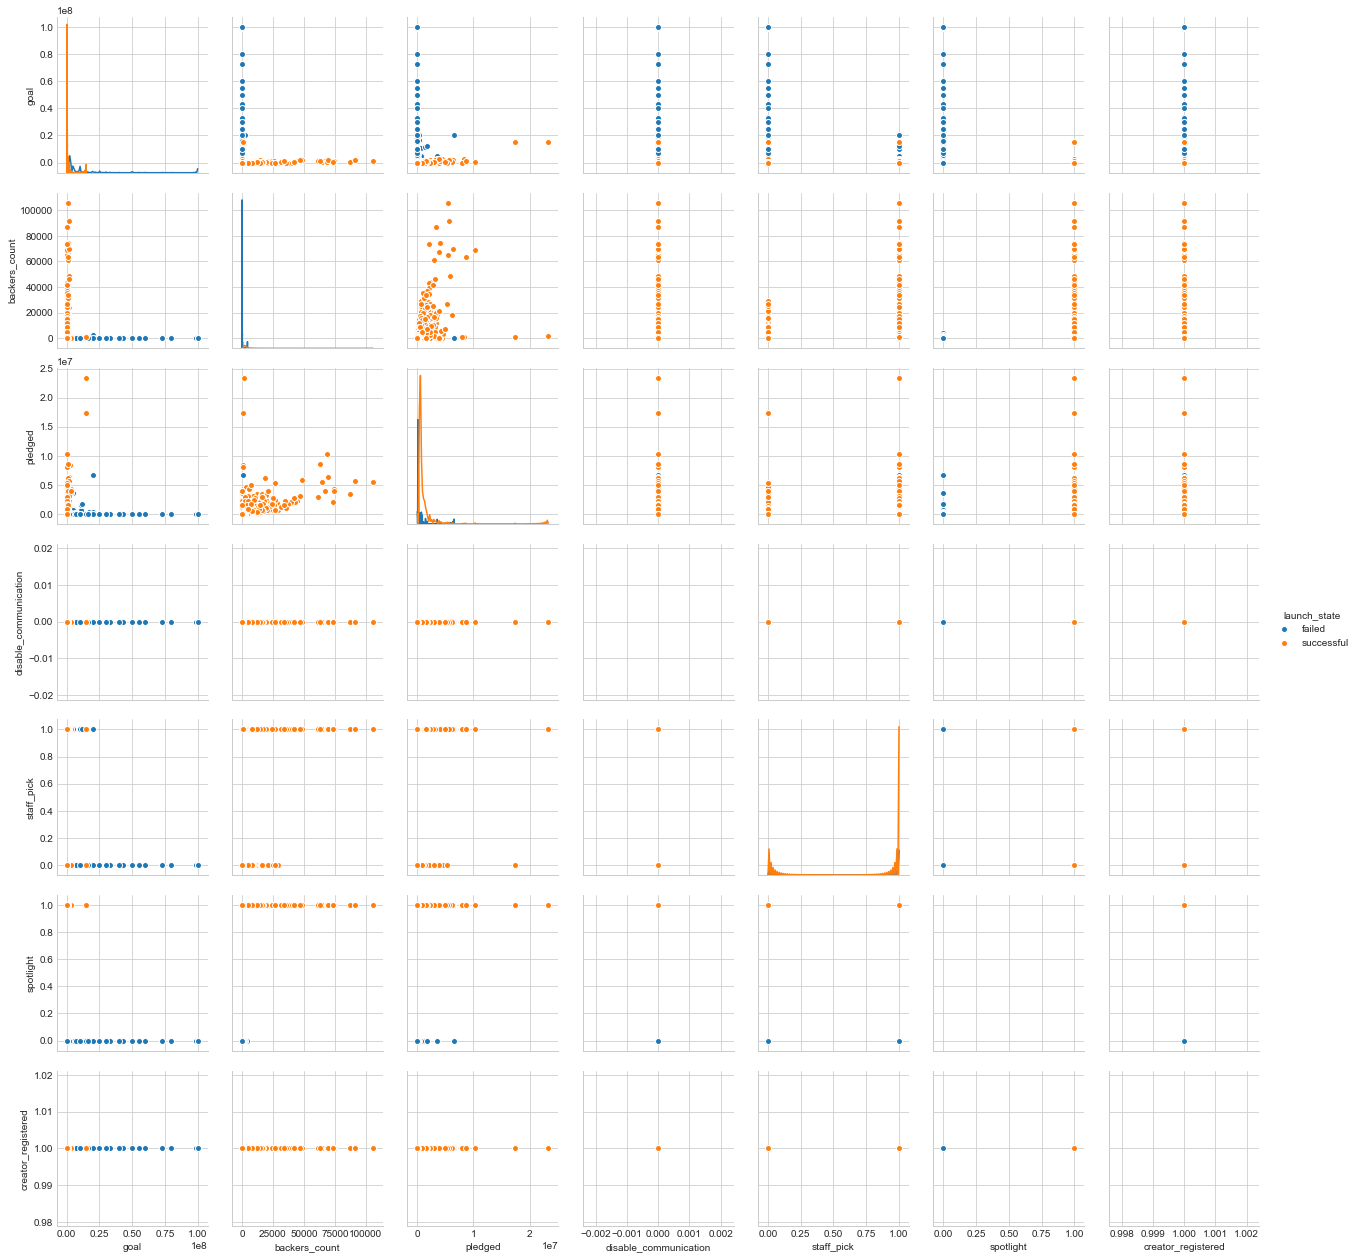

In [12]:
sns.set_style('whitegrid')
sns.pairplot(data=df.drop(columns=['id','name']), hue='launch_state', diag_kind='kde')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Data columns (total 15 columns):
id                       173887 non-null int64
name                     173887 non-null object
category                 173887 non-null object
goal                     173887 non-null float64
backers_count            173887 non-null int64
pledged                  173887 non-null float64
disable_communication    173887 non-null bool
country                  173887 non-null object
deadline                 173887 non-null datetime64[ns]
created_at               173887 non-null datetime64[ns]
launched_at              173887 non-null datetime64[ns]
staff_pick               173887 non-null bool
spotlight                173887 non-null bool
creator_registered       173887 non-null bool
launch_state             173887 non-null object
dtypes: bool(4), datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 21.6+ MB


In [42]:
df.name[0]

'Jozii-College Jobs Made Easy'

In [45]:
df['disable_communication'].unique()

array([False])

In [47]:
df['staff_pick'].unique()

array([False,  True])

In [48]:
df['spotlight'].unique()

array([False,  True])

In [49]:
df['creator_registered'].unique()

array([ True])

In [52]:
df.drop(columns=['name', 'disable_communication', 'creator_registered'], inplace=True)

In [72]:
df.head()

,id,category,goal,backers_count,pledged,country,deadline,created_at,launched_at,staff_pick,spotlight,launch_state
0,895922629,technology,3500.0,1,50.00,US,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,failed
1,1190376005,games,225.0,63,1613.47,US,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,successful
2,672906219,publishing,6500.0,113,6633.00,US,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,successful
3,2121203785,fashion,15000.0,1,1.00,GB,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,failed
4,434454655,fashion,15000.0,99,25338.00,CA,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,successful


In [61]:
category = pd.get_dummies(df['category'], drop_first=True)

In [63]:
category.head()

,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
country = pd.get_dummies(df['country'], drop_first=True)

In [65]:
country.head()

,AF,AG,AL,AM,AQ,AR,AT,AU,AX,AZ,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
d = dict(zip(['failed','successful'], range(0,2)))

In [70]:
d

{'failed': 0, 'successful': 1}

In [75]:
launch_state = df['launch_state'].map(d)

In [85]:
launch_state.sum()

99465

In [93]:
df[df['launch_state'] == 'successful'].shape[0]

99465

In [94]:
df.drop(['category','country','launch_state'],axis=1,inplace=True)

In [95]:
df.head()

,id,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight
0,895922629,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False
1,1190376005,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True
2,672906219,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True
3,2121203785,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False
4,434454655,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True


In [96]:
df = pd.concat([df, country, category, launch_state],axis=1)

In [97]:
df.head()

,id,goal,backers_count,pledged,deadline,created_at,launched_at,staff_pick,spotlight,AF,...,film & video,food,games,journalism,music,photography,publishing,technology,theater,launch_state
0,895922629,3500.0,1,50.00,2014-11-28 04:59:00,2014-10-16 16:19:46,2014-10-28 19:42:54,False,False,0,...,0,0,0,0,0,0,0,1,0,0
1,1190376005,225.0,63,1613.47,2011-11-02 18:39:11,2011-09-28 13:44:12,2011-10-17 18:39:11,True,True,0,...,0,0,1,0,0,0,0,0,0,1
2,672906219,6500.0,113,6633.00,2014-09-12 06:12:18,2014-06-21 04:22:09,2014-08-13 06:12:18,False,True,0,...,0,0,0,0,0,0,1,0,0,1
3,2121203785,15000.0,1,1.00,2016-05-03 20:04:16,2016-03-04 15:03:52,2016-03-04 21:04:16,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,434454655,15000.0,99,25338.00,2015-04-22 05:01:38,2015-02-12 21:29:27,2015-03-18 05:01:38,False,True,0,...,0,0,0,0,0,0,0,0,0,1


Now we need to consider what exactly some of those columns mean:
* id - still just a primary key
* pledged - somewhat useless except as a comparison to the goal. Drop pledged but add a pledged_ratio column (pledged/goal)
* deadline - useless except in comparison to launched_at. Drop deadline but add funding_days.
* created_at - useless; launched_at is more applicable.
* launched_at - keep to maybe create some time series plots.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173887 entries, 0 to 173886
Columns: 218 entries, id to launch_state
dtypes: bool(2), datetime64[ns](3), float64(2), int64(3), uint8(208)
memory usage: 51.8 MB


In [103]:
df.isnull().sum().sum()

0

In [104]:
# ========================================
# LOAD/SAVE CSV
# ========================================
# df.to_csv('data/df.csv', sep=",")

In [105]:
# df = pd.read_csv('data/df.csv', sep=',', na_filter=False, index_col=0, parse_dates=['deadline','created_at','launched_at'])